In [58]:
import pandas as pd
import matplotlib as plt
import chardet
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from pandas.api.types import is_string_dtype

In [59]:
with open("patient_dataset.csv", "rb") as f:
    raw_data = f.read()

result = chardet.detect(raw_data)
encoding = result['encoding']
print(f"Detected encoding: {encoding}")


Detected encoding: ascii


# Data Preprocessing

## Null values


In [60]:
df = pd.read_csv('patient_dataset.csv', encoding= 'ascii')
df.head(10)

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
5,63,1.0,3,18,154,107,0,103.0,67.0,102.0,22.373849,1.062411,0,0,Rural,Non-Smoker
6,48,0.0,3,143,275,165,0,248.0,NaN,136.0,27.900710,1.073761,1,1,Rural,Non-Smoker
7,37,1.0,4,263,201,201,0,186.0,21.0,180.0,35.663404,0.151236,0,0,Urban,Smoker
8,20,0.0,3,113,127,139,1,123.0,NaN,120.0,26.529148,1.910278,1,0,Urban,Non-Smoker
9,77,1.0,1,138,217,201,0,199.0,100.0,132.0,18.393599,1.825306,1,0,Rural,Non-Smoker


In [61]:
df.count().sum()

np.int64(93282)

In [62]:
df.isna().count()

age                  6000
gender               6000
chest_pain_type      6000
blood_pressure       6000
cholesterol          6000
max_heart_rate       6000
exercise_angina      6000
plasma_glucose       6000
skin_thickness       6000
insulin              6000
bmi                  6000
diabetes_pedigree    6000
hypertension         6000
heart_disease        6000
residence_type       6000
smoking_status       6000
dtype: int64

In [79]:
for col in df.columns:
    null_count = df[col].isnull().sum()
    print(f"{col} has {null_count} null(s)")


age has 0 null(s)
gender has 0 null(s)
chest_pain_type has 0 null(s)
blood_pressure has 0 null(s)
cholesterol has 0 null(s)
max_heart_rate has 0 null(s)
exercise_angina has 0 null(s)
plasma_glucose has 0 null(s)
skin_thickness has 0 null(s)
insulin has 0 null(s)
bmi has 0 null(s)
diabetes_pedigree has 0 null(s)
hypertension has 0 null(s)
heart_disease has 0 null(s)
dum_Rural has 0 null(s)
dum_Smoker has 0 null(s)


In [ ]:
#df.dropna(axis=1, inplace = True)

## Dummy variables

In [73]:
dummies=pd.get_dummies(df, prefix= 'dum', dtype=int)
dummies

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Urban,dum_Non-Smoker,dum_Smoker,dum_Unknown
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0,1,0,1,0
1,29,0.0,4,132,187,147,0,202.0,42.0,129.0,25.588346,0.283986,1,1,0,1,0,0,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1,0,1,0,0
3,73,0.0,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1,0,0,1,0
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,1,0,1,0,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0,1,1,0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0,1,1,0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0,1,1,0,0


In [75]:
dummies

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Urban,dum_Non-Smoker,dum_Smoker,dum_Unknown
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0,1,0,1,0
1,29,0.0,4,132,187,147,0,202.0,42.0,129.0,25.588346,0.283986,1,1,0,1,0,0,1
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1,0,1,0,0
3,73,0.0,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1,0,0,1,0
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,1,0,1,0,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0,1,1,0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0,1,1,0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0,1,1,0,0


In [76]:
dummies.drop(['dum_Unknown','dum_Non-Smoker','dum_Urban'],axis=1,inplace=True)

In [77]:
df= dummies
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Smoker
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,0,1
1,29,0.0,4,132,187,147,0,202.0,42.0,129.0,25.588346,0.283986,1,1,0,0
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,1,0
3,73,0.0,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,1,1
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,1,0
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0,0
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0,0
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,0,0


#### Impute Nulls with median

In [78]:
for col in df:
    df[col] = df[col].fillna(df[col].median())

## Outlier and Descr. Stats.

Column: age
  Q1: 36.0
  Q3: 72.0
  IQR: 36.0



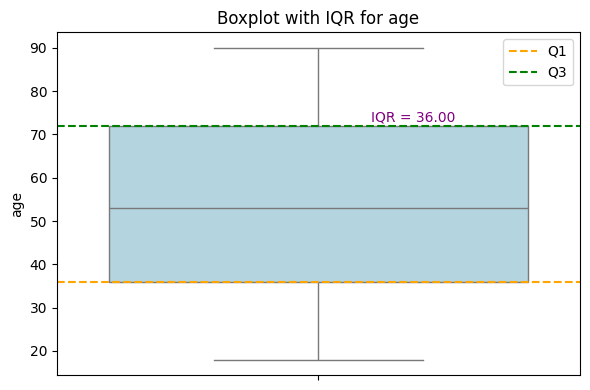

Column: gender
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0



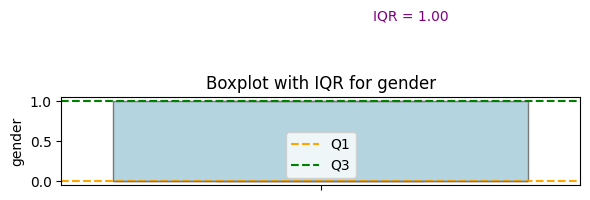

Column: chest_pain_type
  Q1: 2.0
  Q3: 4.0
  IQR: 2.0



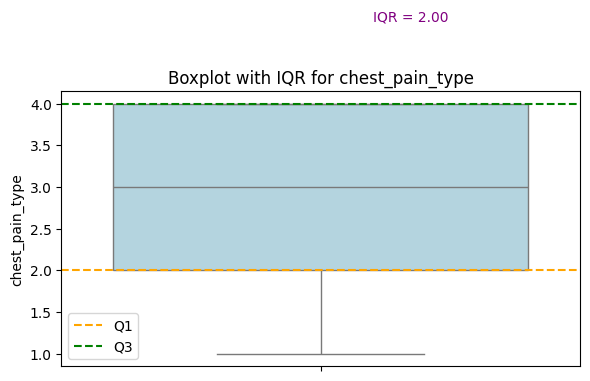

Column: blood_pressure
  Q1: 109.0
  Q3: 161.0
  IQR: 52.0



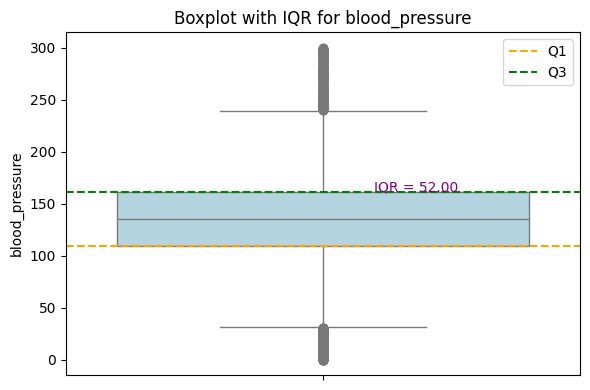

Column: cholesterol
  Q1: 164.0
  Q3: 257.0
  IQR: 93.0



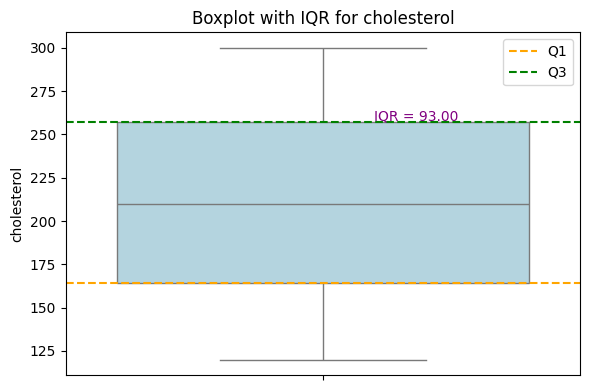

Column: max_heart_rate
  Q1: 108.0
  Q3: 183.0
  IQR: 75.0



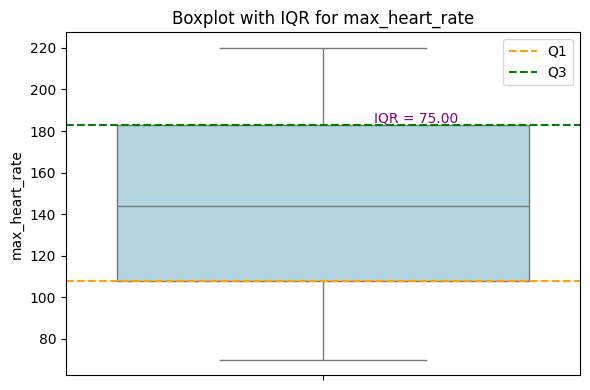

Column: exercise_angina
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0



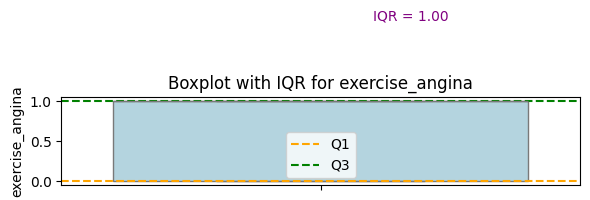

Column: plasma_glucose
  Q1: 121.0
  Q3: 202.0
  IQR: 81.0



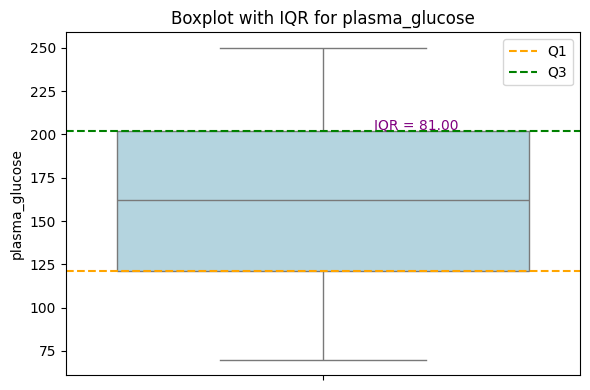

Column: skin_thickness
  Q1: 42.0
  Q3: 78.0
  IQR: 36.0



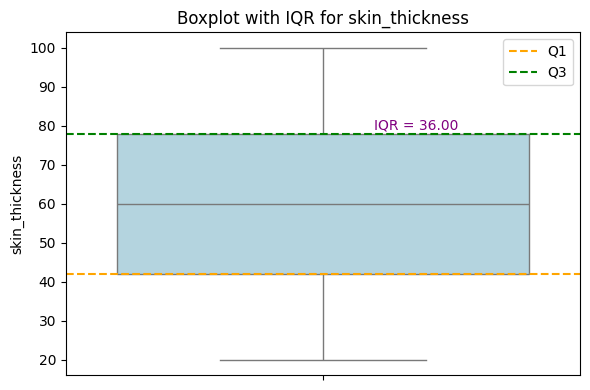

Column: insulin
  Q1: 107.0
  Q3: 152.0
  IQR: 45.0



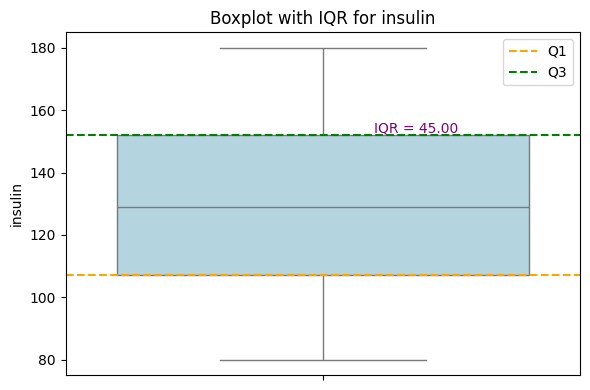

Column: bmi
  Q1: 19.79740121236073
  Q3: 39.85957098131486
  IQR: 20.06216976895413



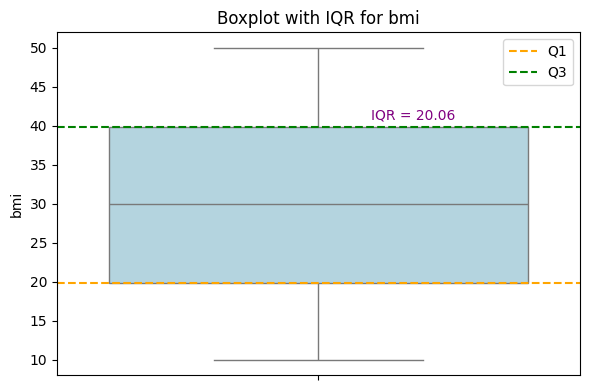

Column: diabetes_pedigree
  Q1: 0.6905220554001249
  Q3: 1.899079147202857
  IQR: 1.208557091802732



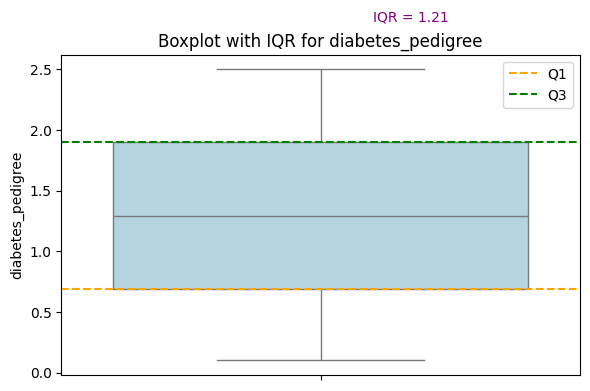

Column: hypertension
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0



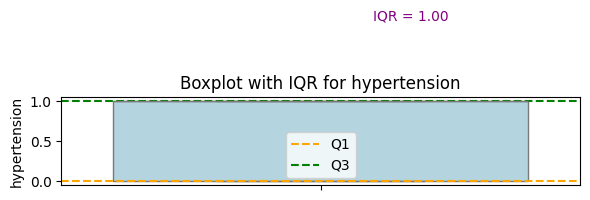

Column: heart_disease
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0



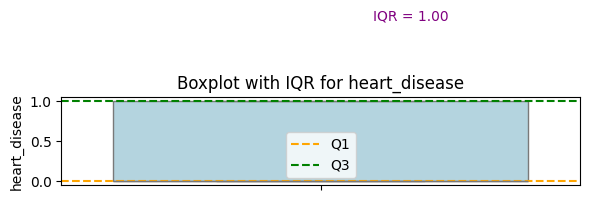

Column: dum_Rural
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0



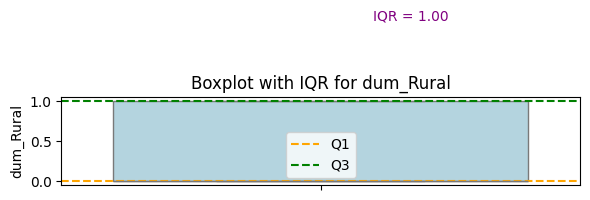

Column: dum_Smoker
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0



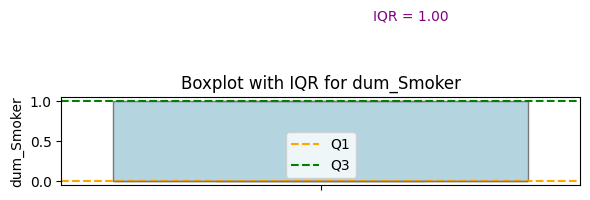

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


# Loop through each numeric column
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"Column: {col}")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}\n")

    # Plot boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightblue')

    # Add IQR reference lines
    plt.axhline(Q1, color='orange', linestyle='--', label='Q1')
    plt.axhline(Q3, color='green', linestyle='--', label='Q3')

    # Add text for IQR
    plt.text(0.1, Q3 + 1, f'IQR = {IQR:.2f}', color='purple')

    plt.title(f'Boxplot with IQR for {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [50]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,dum_Rural,dum_Smoker
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.018273,0.458500,-0.240750,-0.013901,-0.001670,0.013280,-0.496833,-0.009765,-0.000880,0.012096,0.000059,4.684417e-04,-0.498667,0.498167,0.461167,0.464333
std,0.583844,0.498316,0.562035,0.928904,0.568177,0.581111,0.500032,0.613613,0.612260,0.617576,0.579520,5.708721e-01,0.500040,0.500038,0.498531,0.498768
min,-0.972222,0.000000,-1.000000,-2.596154,-0.967742,-0.986667,-1.000000,-1.135802,-1.111111,-1.088889,-0.993593,-9.879462e-01,-1.000000,0.000000,0.000000,0.000000
25%,-0.472222,0.000000,-0.500000,-0.500000,-0.494624,-0.480000,-1.000000,-0.506173,-0.500000,-0.488889,-0.505573,-4.993848e-01,-1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.186581e-17,0.000000,0.000000,0.000000,0.000000
75%,0.527778,1.000000,0.500000,0.500000,0.505376,0.520000,0.000000,0.493827,0.500000,0.511111,0.494427,5.006152e-01,0.000000,1.000000,1.000000,1.000000
max,1.027778,1.000000,0.500000,3.173077,0.967742,1.013333,0.000000,1.086420,1.111111,1.133333,0.999849,9.975351e-01,0.000000,1.000000,1.000000,1.000000


In [67]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6000.000000,5528.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5391.000000,5386.000000,5432.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.657833,0.497648,2.518500,134.277167,209.844667,144.996000,0.503167,161.119644,59.964723,129.601252,29.941495,1.294623,0.501333,0.498167
std,21.018382,0.500040,1.124071,48.303001,52.840432,43.583318,0.500032,52.434693,23.264030,29.207479,11.626425,0.689932,0.500040,0.500038
min,18.000000,0.000000,1.000000,0.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000
25%,36.000000,0.000000,2.000000,109.000000,164.000000,108.000000,0.000000,116.000000,40.000000,105.000000,19.797401,0.690522,0.000000,0.000000
50%,53.000000,0.000000,3.000000,135.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.940303,1.294057,1.000000,0.000000
75%,72.000000,1.000000,4.000000,161.000000,257.000000,183.000000,1.000000,206.000000,80.000000,155.000000,39.859571,1.899079,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000


In [48]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Create a scaler and fit-transform
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


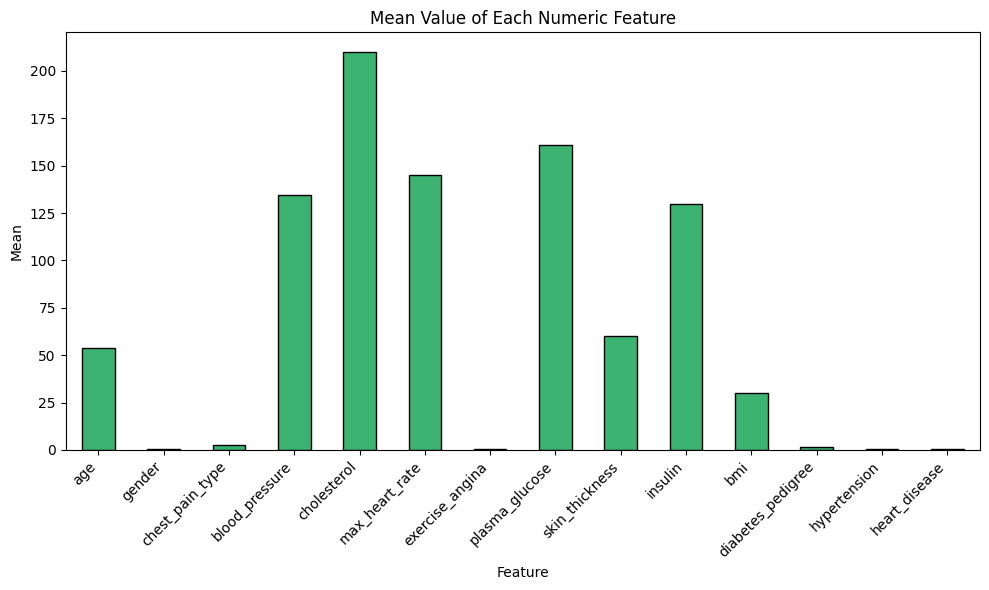

In [68]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Compute mean of each column
col_means = numeric_cols.mean()

# Plot bar chart
plt.figure(figsize=(10, 6))
col_means.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Mean Value of Each Numeric Feature')
plt.xlabel('Feature')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




## Elbow Method

In [ ]:
x = df['cholesterol']

y = df.drop(df['cholesterol'])

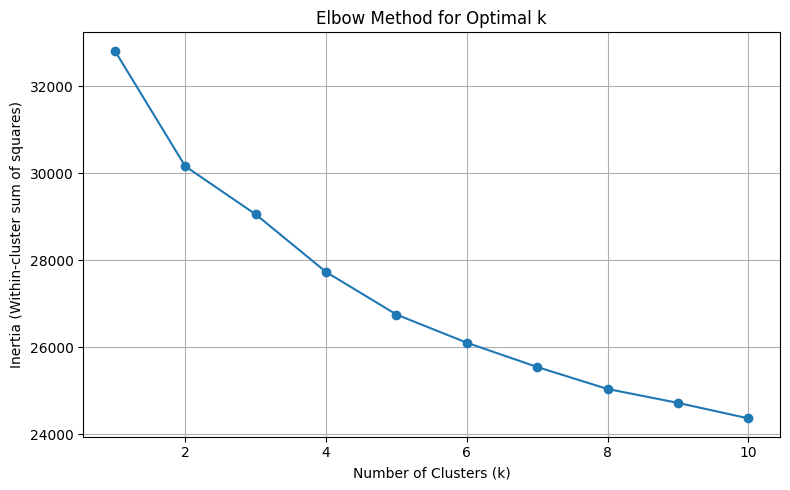

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Use only numeric columns for clustering
X = df.select_dtypes(include='number')

# Store the sum of squared distances for each k
inertia = []

# Try k values from 1 to 10
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia = sum of squared distances to closest cluster center

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.tight_layout()
plt.show()



## K-Means Clustering

In [85]:
from sklearn.cluster import KMeans
import pandas as pd

# Select only numeric columns (important for clustering)
X = df.select_dtypes(include='number')

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # You can change n_clusters based on elbow method
df['Cluster'] = kmeans.fit_predict(X)

# Check the first few rows with cluster labels
print(df.head())


   age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     0.0                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0    129.0  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease  dum_Rural  dum_Smoker  

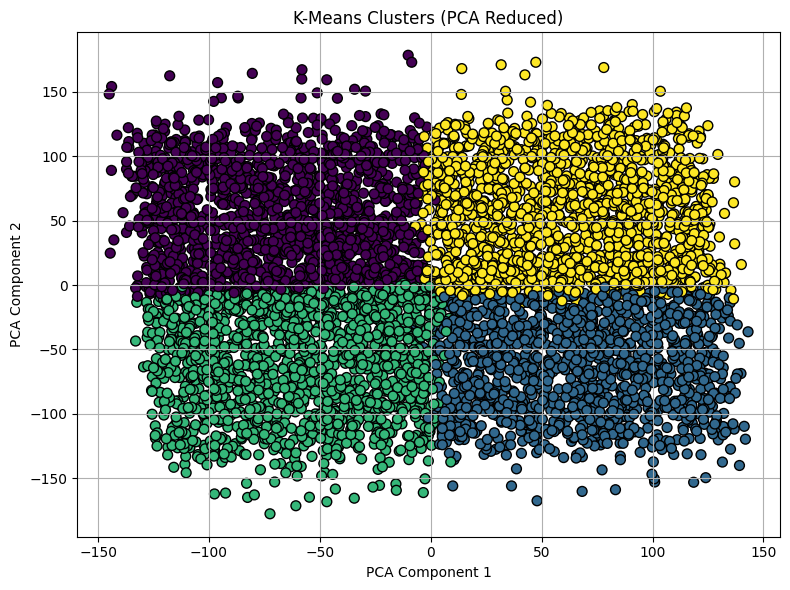

In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# Add PCA components to DataFrame
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=50, edgecolor='k')
plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

### PCA

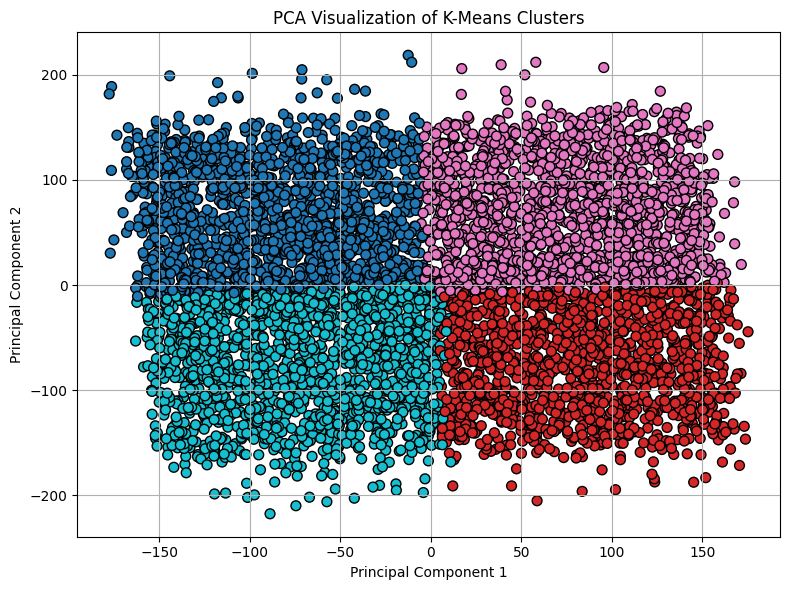

In [86]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df already has 'Cluster' from KMeans
# Select numeric features (excluding the 'Cluster' column)
features = df.select_dtypes(include='number').drop(columns='Cluster')

# Apply PCA (reduce to 2 components for 2D plot)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Add PCA results to the dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot PCA results with cluster labels
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='tab10', s=50, edgecolor='k')
plt.title('PCA Visualization of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()
